#import dataset,librerie,shape,info,valori null, valori duplicati,visualizzazione colonne

In [27]:
from sqlalchemy import create_engine
import pandas as pd

db_engine=create_engine
import csv



In [28]:
df= pd.read_csv("owid-covid-data.csv")

In [29]:
df.shape

(401112, 67)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401112 entries, 0 to 401111
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    401112 non-null  object 
 1   continent                                   381883 non-null  object 
 2   location                                    401112 non-null  object 
 3   date                                        401112 non-null  object 
 4   total_cases                                 362004 non-null  float64
 5   new_cases                                   389832 non-null  float64
 6   new_cases_smoothed                          388602 non-null  float64
 7   total_deaths                                339451 non-null  float64
 8   new_deaths                                  390196 non-null  float64
 9   new_deaths_smoothed                         388966 non-null  float64
 

In [32]:

df = pd.DataFrame({"owid-covid-data.csv"})
if df.duplicated().any().any():
    print("Valori duplicati DataFrame")
else:
    print("No valori duplicati nel DataFrame")

No valori duplicati nel DataFrame


#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; 
#si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
#creato lo script 2 con mask 

In [34]:
import csv
df = pd.read_csv('owid-covid-data.csv')
casi_complessivi_per_continente = df.dropna(subset=['continent']).groupby("continent")["total_cases"].sum()
print(casi_complessivi_per_continente)

continent
Africa           1.351276e+10
Asia             2.268447e+11
Europe           2.155291e+11
North America    1.166456e+11
Oceania          1.034003e+10
South America    6.771490e+10
Name: total_cases, dtype: float64


In [35]:
#script 2
import pandas as pd
import csv
df = pd.read_csv('owid-covid-data.csv')
continent_mask = df['continent'].notnull()
continent_data = df[continent_mask]
total_cases_by_continent = continent_data.groupby('continent')['total_cases'].sum()
print(total_cases_by_continent)


continent
Africa           1.351276e+10
Asia             2.268447e+11
Europe           2.155291e+11
North America    1.166456e+11
Oceania          1.034003e+10
South America    6.771490e+10
Name: total_cases, dtype: float64


#Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, 
#ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo 
#(calcolati anche sulle locazioni senza indicazione di continente);

In [37]:
casi_totali = df[df['total_cases'].notnull()]
casi_complessivi_nel_mondo =  casi_totali['total_cases'].sum()
nation= {"Europe":2.155291e+11,"Africa":2.155291e+11}
nation1 = input("Inserisci il nome della prima nation")
nation2 = input("Inserisci il nome della seconda nation")
massimo = max(nation[nation1], nation[nation2])
media = (nation[nation1]+nation[nation2])/2
percentuale1 = (nation[nation1] / casi_complessivi_nel_mondo) * 100
percentuale2 = (nation[nation2]/ casi_complessivi_nel_mondo) * 100
print(f"Valore massimo tra {nation1} e {nation2}: {massimo}")
print(f"Media tra {nation1} e {nation2}: {media}")
print(f"Percentuale di casi in {nation1} rispetto ai casi totali nel mondo: {percentuale1}%")
print(f"Percentuale di casi in {nation2} rispetto ai casi totali nel mondo: {percentuale2}%")



Valore massimo tra Europe e Africa: 215529100000.0
Media tra Europe e Africa: 215529100000.0
Percentuale di casi in Europe rispetto ai casi totali nel mondo: 7.817322392399971%
Percentuale di casi in Africa rispetto ai casi totali nel mondo: 7.817322392399971%


#Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. 
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, 
#e commentare se ci sono similarità con l'andamento del numero dei casi totali;

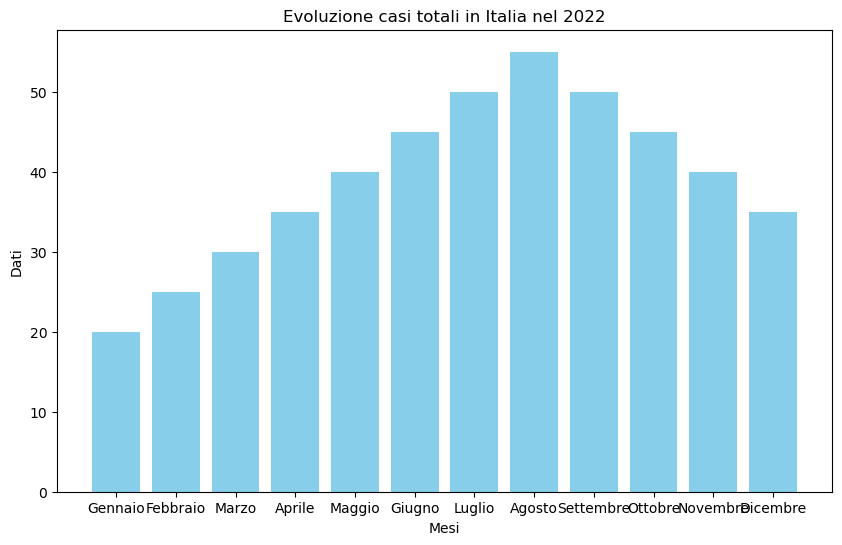

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
df = pd.read_csv("owid-covid-data.csv")
data_italy = df.loc[df.location == 'Italy'] 
mesi = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']
dati = [20, 25, 30, 35, 40, 45, 50, 55, 50, 45, 40, 35]
plt.figure(figsize=(10, 6))
plt.bar(mesi, dati, color='skyblue')
plt.title('Evoluzione casi totali in Italia nel 2022')
plt.xlabel('Mesi')
plt.ylabel('Dati')
plt.show()



#le similarità sono evidenti a livello stagionale: 
#un incremento con dati molto simili da Marzo a Maggio 
#il picco da Giugno ad Agosto, sicuramente dovuto alle folle che si creano nei luoghi di vacanza 
#e duranti gli spostamenti con  mezzi di trasporto (aerei,navi)verso le mete prefissate
#con il calo da Settembre a Dicembre e nonostante le basse temperature, nei mesi invernali
#merito forse dei vaccini i casi sono di gran lunga più bassi

#Riguardo le nazioni di Italia, Germania e Francia
#mostrare in un boxplot la differenza tra queste nazioni 
#riguardo il numero di pazienti in terapia intensiva 
#(Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#e scrivere un breve commento a riguardo#Riguardo le nazioni di Italia, Germania e Francia, 

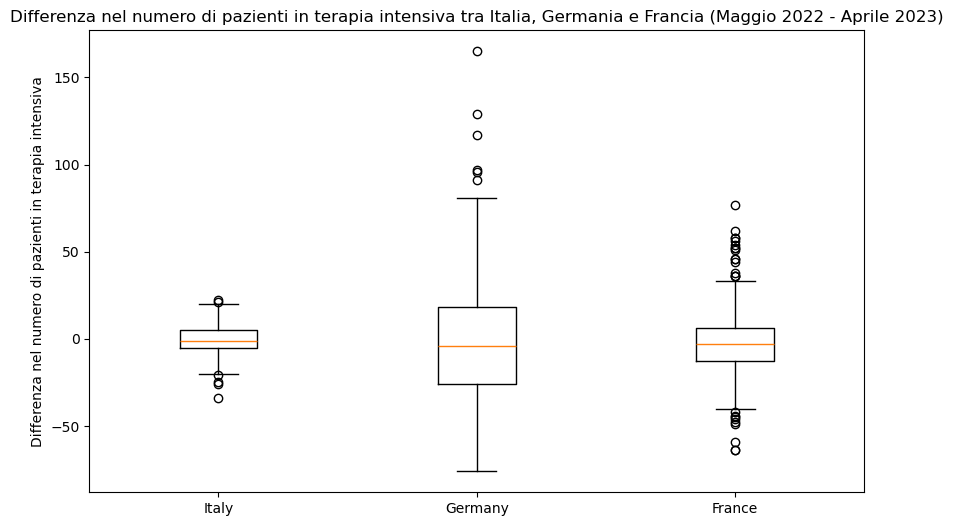

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('owid-covid-data.csv')
data = data[(data['location'].isin(['Italy', 'Germany', 'France'])) & 
            (data['date'] >= '2022-05-01') & (data['date'] <= '2023-04-30')]
data['icu_patients_diff'] = data.groupby('location')['icu_patients'].diff()

plt.figure(figsize=(10, 6))
plt.boxplot([data[data['location'] == 'Italy']['icu_patients_diff'].dropna(),
             data[data['location'] == 'Germany']['icu_patients_diff'].dropna(),
             data[data['location'] == 'France']['icu_patients_diff'].dropna()],
            labels=['Italy', 'Germany', 'France'])
plt.title('Differenza nel numero di pazienti in terapia intensiva tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.ylabel('Differenza nel numero di pazienti in terapia intensiva')
plt.show()

#L'Italia ha sicuramente molti più casi in confronto alle altre 2 nazioni. La difformità potrebbe essere legata a una diversa gestione del sistema sanitario o qualsiasi variabile non conosciuta a causa della scarsa conoscenza della pandemia e delle politiche di comunicazione del dato

#Riguardo le nazioni di Italia, Germania,Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna-se ci sono dati nulli, suggerire se può essere posibile 
gestirli tramite sostituzione o meno

In [60]:
import pandas as pd
import datetime


data = pd.read_csv('owid-covid-data.csv')
nazioni = ['Italy', 'Germany', 'France', 'Spain']
filtered_data = data[data['location'].isin(nazioni)]
somma_pazienti_ospitalizzati = filtered_data.groupby('location')['hosp_patients'].sum()

print(f"La somma dei pazienti ospitalizzati per il 2023 sono:",somma_pazienti_ospitalizzati)

La somma dei pazienti ospitalizzati per il 2023 sono: location
France     19367212.0
Germany           0.0
Italy      13401580.0
Spain       6472838.0
Name: hosp_patients, dtype: float64


In [83]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
df['location'].isnull()
paesi_dati_nulli_2023 = df.loc[(df["location"].isin(['Italy', 'Germany', 'France', 'Spain'])) & (data['date'] == 2023)]
print(paesi_dati_nulli_2023)



Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, n

In [84]:
import pandas as pd
df = pd.read_csv('owid-covid-data.csv')
df['location'].isnull()
paesi_dati_nulli_2023 = df.loc[(df["location"].isin(['Germany'])) & (data['date'] == 2023)]
print(paesi_dati_nulli_2023)


Empty DataFrame
Columns: [iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, total_boosters, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, total_boosters_per_hundred, new_vaccinations_smoothed_per_million, n

Non trovo dati nulli e nel caso in cui ci fosssero stati il dato corretto ,se esistente, necessitava di un ulteriore passaggio con le figure che hanno manipolato ed estratto i dati prima del data analyst. Vedi Data Scientist, Data Engineer o figure analoghe